In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def kernel_pdf(D, xm, h):
    """
    HPM 9/2/24, creates kernel density estimate
    INPUT: D = 1-D data array
           xm = locations of PDF estimates
           h = window size
    OUTPUT: kde = kernel density estimate
    """
    kde = np.zeros_like(xm) # initialize array
    dx = xm[1] - xm[0] # get step size, assuming uniform
    # now do loop over all xm
    n=0
    for x0 in xm:
        dist = D - x0 # subtract x0 from all values in D
        Ix = np.abs(dist)<h # find data within window 
        w = 15/16 * (1-(dist[Ix]/h)**2)**2 # weights from bisquare kernel
        kde[n] = np.sum(w) # sum the weights for the estimate
        n+=1 # increment n

    kde /= np.sum(kde * dx)  # normalize estimate to integrate to 1
    return kde

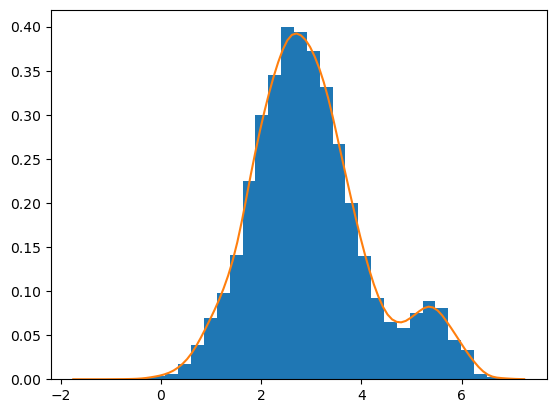

In [32]:
mu=2.75
sig=0.9
D = np.random.normal(mu, sig, 10000) # grab data from normal distribution
D2 = np.random.normal(mu+3*sig, sig/2, 1000) # grab data from normal distribution
D=np.concatenate((D,D2),axis=None)
xm=np.linspace(mu-5*sig,mu+5*sig,100)
h=0.5
kde=kernel_pdf(D,xm,h)
count, bins, ignored = plt.hist(D, 30, density=True)
plt.plot(xm,kde)

array([0])